In [493]:
# pandas
import pandas as pd

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.preprocessing import StandardScaler


In [494]:
train_data = pd.read_csv('train.csv')
test_data  = pd.read_csv('test.csv')

In [495]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [496]:
train_data = train_data.drop(['PassengerId'], axis=1)

## Sex

In [497]:
train_data['Sex'].isnull().value_counts()

False    891
Name: Sex, dtype: int64

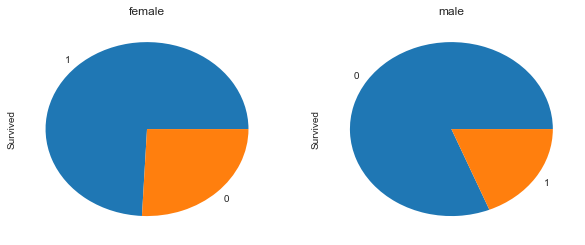

In [498]:
fig = plt.figure(figsize=(10,4))
fig.add_subplot(122)
train_data['Survived'][train_data.Sex=='male'].value_counts().plot(kind='pie',title = 'male')
fig.add_subplot(121)
train_data['Survived'][train_data.Sex=='female'].value_counts().plot(kind='pie',title = 'female')

In [499]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])

In [500]:
print(dict(enumerate(label_encoder.classes_)))

{0: 'female', 1: 'male'}


## Passenger names

In [501]:
train_data['Name'].isnull().value_counts()

False    891
Name: Name, dtype: int64

In [502]:
train_data['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [503]:
train_data['Name'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [504]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,S
4,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,S


In [505]:
train_data.Name.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

## Age

In [506]:
train_data['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [507]:
train_data['Age'].fillna(-1, inplace=True)

In [508]:
train_data.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,C


In [509]:
medians = dict()
for title in train_data.Name.unique():
    median = train_data.Age[(train_data["Age"] != -1) & (train_data['Name'] == title)].median()
    medians[title] = median
    
for index, row in train_data.iterrows():
    if row['Age'] == -1:
        train_data.loc[index, 'Age'] = medians[row['Name']]

train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,S
4,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,S


In [510]:
train_data['Age'] = StandardScaler().fit_transform(train_data['Age'].values.reshape(-1, 1))


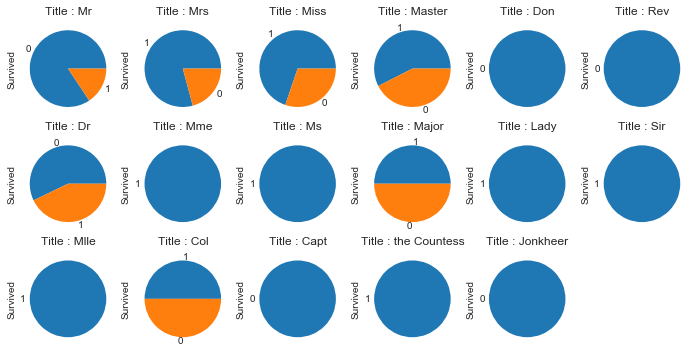

In [511]:
fig = plt.figure(figsize=(12,6))

i=1
for title in train_data['Name'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('Title : {}'.format(title))
    train_data.Survived[train_data['Name'] == title].value_counts().plot(kind='pie')
    i += 1


In [512]:
replacement = {
    'Don': 0,
    'Rev': 0,
    'Jonkheer': 0,
    'Capt': 0,
    'Mr': 1,
    'Dr': 2,
    'Col': 3,
    'Major': 3,
    'Master': 4,
    'Miss': 5,
    'Mrs': 6,
    'Mme': 7,
    'Ms': 7,
    'Mlle': 7,
    'Sir': 7,
    'Lady': 7,
    'the Countess': 7
}

train_data['Name'] = train_data['Name'].apply(lambda x: replacement.get(x))

train_data['Name'] = StandardScaler().fit_transform(train_data['Name'].values.reshape(-1, 1))

##  Fares 

In [513]:
from sklearn.preprocessing import StandardScaler

train_data['Fare'].fillna(-1, inplace=True)
medians = dict()
for pclass in train_data['Pclass'].unique():
    median = train_data.Fare[(train_data["Fare"] != -1) & (train_data['Pclass'] == pclass)].median()
    medians[pclass] = median
for index, row in train_data.iterrows():
    if row['Fare'] == -1:
        train_data.loc[index, 'Fare'] = medians[row['Pclass']]
train_data['Fare'] = StandardScaler().fit_transform(train_data['Fare'].values.reshape(-1, 1))

In [514]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,-0.797294,1,-0.557420,1,0,A/5 21171,-0.502445,NaN,S
1,1,1,1.537975,0,0.649410,1,0,PC 17599,0.786845,C85,C
2,1,3,1.070922,0,-0.255712,0,0,STON/O2. 3101282,-0.488854,NaN,S
3,1,1,1.537975,0,0.423129,1,0,113803,0.420730,C123,S
4,0,3,-0.797294,1,0.423129,0,0,373450,-0.486337,NaN,S


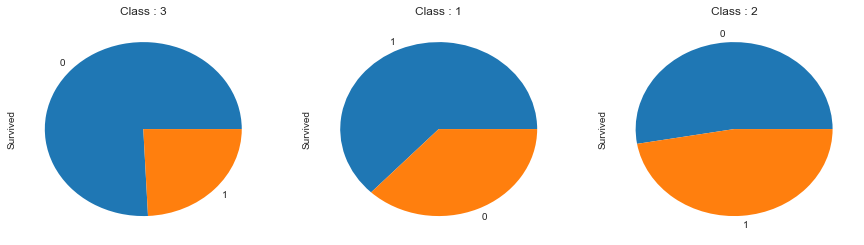

In [515]:
fig = plt.figure(figsize=(15,4))

i=1
for pclass in train_data['Pclass'].unique():
    fig.add_subplot(1, 3, i)
    plt.title('Class : {}'.format(pclass))
    train_data.Survived[train_data['Pclass'] == pclass].value_counts().plot(kind='pie')
    i += 1

In [516]:
train_data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,-0.797294,1,-0.557420,1,0,A/5 21171,-0.502445,NaN,S
1,1,1,1.537975,0,0.649410,1,0,PC 17599,0.786845,C85,C
2,1,3,1.070922,0,-0.255712,0,0,STON/O2. 3101282,-0.488854,NaN,S
3,1,1,1.537975,0,0.423129,1,0,113803,0.420730,C123,S
4,0,3,-0.797294,1,0.423129,0,0,373450,-0.486337,NaN,S


## Pclass

In [517]:
train_data['Pclass'] = StandardScaler().fit_transform(train_data['Pclass'].values.reshape(-1, 1))

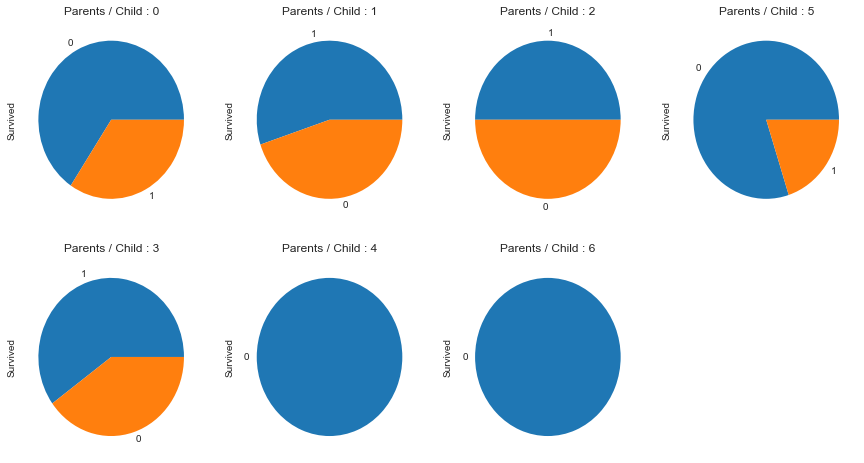

In [518]:
fig = plt.figure(figsize=(15,8))
i = 0
for parch in train_data['Parch'].unique():
    fig.add_subplot(2, 4, i+1)
    plt.title('Parents / Child : {}'.format(parch))
    train_data.Survived[train_data['Parch'] == parch].value_counts().plot(kind='pie')
    i += 1

## Parch

In [519]:
replacement = {
    6: 0,
    4: 0,
    5: 1,
    0: 2,
    2: 3,
    1: 4,
    3: 5
}
train_data['Parch'] = train_data['Parch'].apply(lambda x: replacement.get(x))
train_data['Parch'] = StandardScaler().fit_transform(train_data['Parch'].values.reshape(-1, 1))

## Embarked

In [520]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

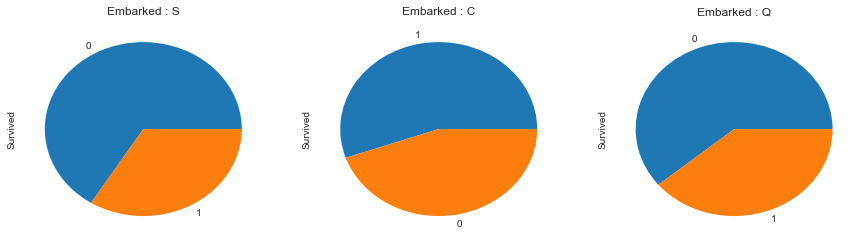

In [521]:
train_data['Embarked'].fillna('S', inplace=True)
fig = plt.figure(figsize=(15,4))
i = 1
for embarked in train_data['Embarked'].unique():
    fig.add_subplot(1, 3, i)
    plt.title('Embarked : {}'.format(embarked))
    train_data.Survived[train_data['Embarked'] == embarked].value_counts().plot(kind='pie')
    i += 1

In [522]:
replacement = {
    'S': 0,
    'Q': 1,
    'C': 2
}

train_data['Embarked'] = train_data['Embarked'].apply(lambda x: replacement.get(x))
train_data['Embarked'] = StandardScaler().fit_transform(train_data['Embarked'].values.reshape(-1, 1))
train_data.head()['Embarked']

0   -0.585954
1    1.942303
2   -0.585954
3   -0.585954
4   -0.585954
Name: Embarked, dtype: float64

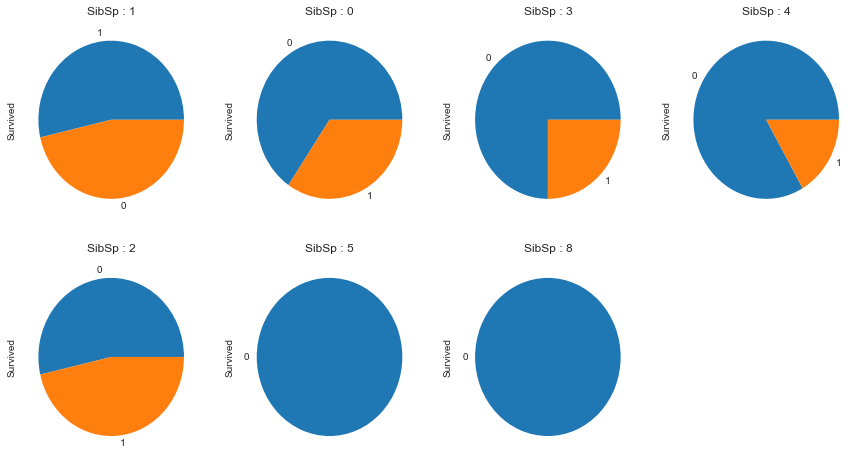

In [523]:
fig = plt.figure(figsize=(15,8))
i = 1
for sibsp in train_data['SibSp'].unique():
    fig.add_subplot(2, 4, i)
    plt.title('SibSp : {}'.format(sibsp))
    train_data.Survived[train_data['SibSp'] == sibsp].value_counts().plot(kind='pie')
    i += 1

In [524]:
train_data['SibSp'] = label_encoder.fit_transform(train_data['SibSp'])
train_data['SibSp'] = StandardScaler().fit_transform(train_data['SibSp'].values.reshape(-1, 1))



In [525]:
train_data['Cabin'].fillna('U', inplace=True)
train_data['Cabin'] = train_data['Cabin'].apply(lambda x: x[0])
train_data['Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [526]:
train_data['Cabin'] = label_encoder.fit_transform(train_data['Cabin'])
train_data['Cabin'] = StandardScaler().fit_transform(train_data['Cabin'].values.reshape(-1, 1))


In [527]:
train_data.drop('Ticket', axis=1, inplace=True)


In [528]:
train_data.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,0.827377,-0.797294,1,-0.557420,0.490044,-0.468807,-0.502445,0.522067,-0.585954
1,1,-1.566107,1.537975,0,0.649410,0.490044,-0.468807,0.786845,-1.917594,1.942303
2,1,0.827377,1.070922,0,-0.255712,-0.504555,-0.468807,-0.488854,0.522067,-0.585954
3,1,-1.566107,1.537975,0,0.423129,0.490044,-0.468807,0.420730,-1.917594,-0.585954
4,0,0.827377,-0.797294,1,0.423129,-0.504555,-0.468807,-0.486337,0.522067,-0.585954


## Model selection

In [529]:
from sklearn.model_selection import train_test_split
survived = train_data['Survived']
train_data.drop('Survived', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(train_data, survived, test_size=0.2, random_state=42)

In [530]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

models = [
    RandomForestClassifier(n_estimators=100),
    MLPClassifier(),
    KNeighborsClassifier(n_neighbors=3),
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(max_depth=5, random_state=0),
    SVC(),
    GaussianProcessClassifier()
]

for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(score)


0.8268156424581006
0.8324022346368715
0.8044692737430168
0.776536312849162
0.8491620111731844
0.8100558659217877
0.8212290502793296


In [531]:
from sklearn import cross_validation
kfold = 5
val_scores = {}
for model in models:
    scores = cross_validation.cross_val_score(model, train_data, survived, cv = kfold)
    val_scores[str(model).split('(')[0]] = scores.mean()

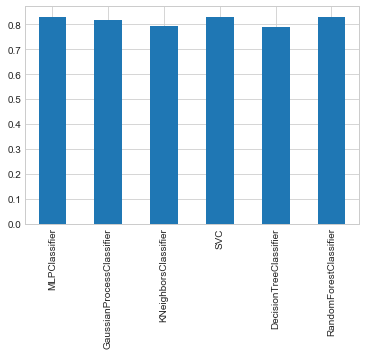

In [532]:
DataFrame.from_dict(data = val_scores, orient='index').plot(kind='bar', legend=False)

## Cleaning test data

In [547]:
test_data  = pd.read_csv('test.csv')
result = DataFrame(test_data.PassengerId) 

test_data = test_data.drop(['PassengerId'], axis=1)
test_data['Sex'] = label_encoder.fit_transform(test_data['Sex'])
test_data['Name'] = test_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_data['Age'].fillna(-1, inplace=True)

medians = dict()

for title in test_data.Name.unique():
    if title == 'Ms':
        median = 0
    else:
        median = test_data.Age[(test_data["Age"] != -1) & (test_data['Name'] == title)].median()
    medians[title] = median
    print title, '===', median 

    
for index, row in test_data.iterrows():
    if row['Age'] == -1:
        test_data.loc[index, 'Age'] = medians[row['Name']]

test_data['Age'] = StandardScaler().fit_transform(test_data['Age'].values.reshape(-1, 1))

replacement = {
    'Don': 0,
    'Rev': 0,
    'Jonkheer': 0,
    'Dona':0,
    'Capt': 0,
    'Mr': 1,
    'Dr': 2,
    'Col': 3,
    'Major': 3,
    'Master': 4,
    'Miss': 5,
    'Mrs': 6,
    'Mme': 7,
    'Ms': 7,
    'Mlle': 7,
    'Sir': 7,
    'Lady': 7,
    'the Countess': 7
}



test_data['Name'] = test_data['Name'].apply(lambda x: replacement.get(x))

test_data['Name'] = StandardScaler().fit_transform(test_data['Name'].values.reshape(-1, 1))

from sklearn.preprocessing import StandardScaler

test_data['Fare'].fillna(-1, inplace=True)
medians = dict()
for pclass in test_data['Pclass'].unique():
    median = test_data.Fare[(test_data["Fare"] != -1) & (test_data['Pclass'] == pclass)].median()
    medians[pclass] = median
    
for index, row in test_data.iterrows():
    if row['Fare'] == -1:
        test_data.loc[index, 'Fare'] = medians[row['Pclass']]
        
test_data['Fare'] = StandardScaler().fit_transform(test_data['Fare'].values.reshape(-1, 1))
test_data['Pclass'] = StandardScaler().fit_transform(test_data['Pclass'].values.reshape(-1, 1))

replacement = {
    6: 0,
    4: 0,
    5: 1,
    0: 2,
    2: 3,
    1: 4,
    3: 5,
    9: 0
}

test_data['Parch'] = test_data['Parch'].apply(lambda x: replacement.get(x))
test_data['Parch'] = StandardScaler().fit_transform(test_data['Parch'].values.reshape(-1, 1))
replacement = {
    'S': 0,
    'Q': 1,
    'C': 2
}
test_data['Embarked'].fillna('S', inplace=True)


test_data['Embarked'] = test_data['Embarked'].apply(lambda x: replacement.get(x))
test_data['Embarked'] = StandardScaler().fit_transform(test_data['Embarked'].values.reshape(-1, 1))

test_data['SibSp'] = label_encoder.fit_transform(test_data['SibSp'])
test_data['SibSp'] = StandardScaler().fit_transform(test_data['SibSp'].values.reshape(-1, 1))

test_data['Cabin'].fillna('U', inplace=True)
test_data['Cabin'] = test_data['Cabin'].apply(lambda x: x[0])

test_data['Cabin'] = label_encoder.fit_transform(test_data['Cabin'])
test_data['Cabin'] = StandardScaler().fit_transform(test_data['Cabin'].values.reshape(-1, 1))

test_data.drop('Ticket', axis=1, inplace=True)

Mr === 28.5
Mrs === 36.5
Miss === 22.0
Master === 7.0
Ms === 0
Col === 50.0
Rev === 35.5
Dr === 53.0
Dona === 39.0


In [548]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.873482,-0.819966,1,0.375412,-0.532181,-0.421511,-0.497071,0.500456,0.470915
1,0.873482,1.486533,0,1.334595,0.683402,-0.421511,-0.511934,0.500456,-0.700767
2,-0.315819,-0.819966,1,2.485615,-0.532181,-0.421511,-0.463762,0.500456,0.470915
3,0.873482,-0.819966,1,-0.200097,-0.532181,-0.421511,-0.482135,0.500456,-0.700767
4,0.873482,1.486533,0,-0.583771,0.683402,2.188734,-0.417159,0.500456,-0.700767


## Prediction 

In [549]:
models[4].fit(train_data, survived)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [550]:
prediction = models[4].predict(test_data)

In [551]:
result.insert(1,'Survived', prediction)
result.to_csv('result.csv', index=False)


In [552]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
